In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

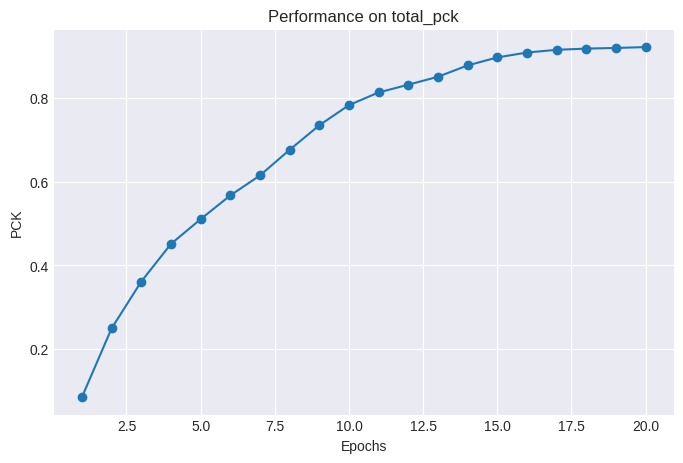

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

def plot_model_performance(file_url, joint_name):
    # Define the joint names mapping
    joints = ["total_pck", "Right ankle", "Right knee", "Right hip", "Left hip", "Left knee", "Left ankle", "Right wrist", "Right elbow", "Right shoulder", "Left shoulder", "Left elbow", "Left wrist", "Neck", "Head top"]

    # Check if joint_name is valid
    if joint_name not in joints:
        print("Invalid joint name. Please choose from:", joints)
        return

    # Index of the joint in the data
    joint_index = joints.index(joint_name)

    # Fetching the file content from GitHub
    response = requests.get(file_url)
    if response.status_code != 200:
        print("Failed to fetch the file. Please check the URL.")
        return

    # Reading the data into a DataFrame
    try:
        data = pd.read_csv(io.StringIO(response.text), sep=" ", header=None)
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Adjusting the epoch number to start from 1
    data[0] = data[0] + 1

    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.plot(data[0], data[joint_index + 1], marker='o')  # +1 to account for the epoch column
    plt.title(f'Performance on {joint_name}')
    plt.xlabel('Epochs')
    plt.ylabel('PCK')
    plt.grid(True)
    plt.show()

# Test the function with the URL of the file
file_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_training/accuracies_training_base.txt"
plot_model_performance(file_url, "total_pck")

<ipython-input-32-c606a25d9678>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


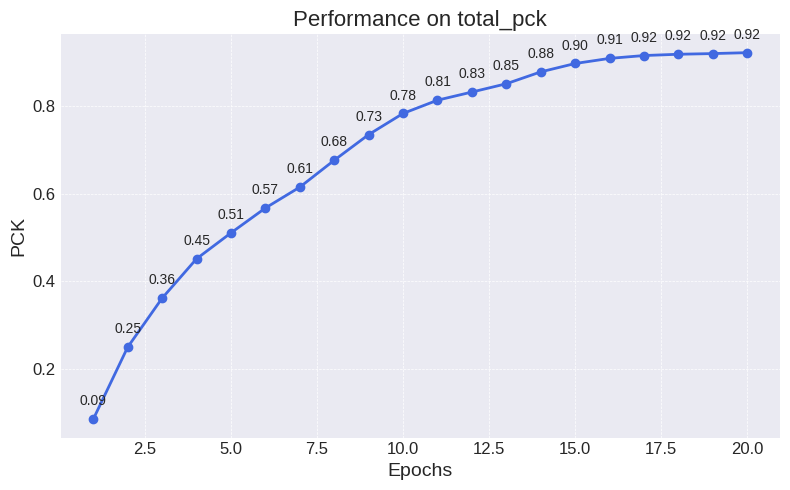

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

def plot_model_performance(file_url, joint_name):
    # Use a predefined style for nicer plots
    plt.style.use('seaborn-darkgrid')

    # Define the joint names mapping
    joints = ["total_pck", "Right ankle", "Right knee", "Right hip", "Left hip", "Left knee", "Left ankle", "Right wrist", "Right elbow", "Right shoulder", "Left shoulder", "Left elbow", "Left wrist", "Neck", "Head top"]

    # Check if joint_name is valid
    if joint_name not in joints:
        print("Invalid joint name. Please choose from:", joints)
        return

    # Index of the joint in the data
    joint_index = joints.index(joint_name)

    # Fetching the file content from GitHub
    response = requests.get(file_url)
    if response.status_code != 200:
        print("Failed to fetch the file. Please check the URL.")
        return

    # Reading the data into a DataFrame
    try:
        data = pd.read_csv(io.StringIO(response.text), delim_whitespace=True, header=None)
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Adjusting the epoch number to start from 1
    data[0] = data[0] + 1

    # Plotting the data
    plt.figure(figsize=(8, 5))
    plt.plot(data[0], data[joint_index + 1], marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6)  # +1 to account for the epoch column
    # Label each point with its PCK value
    for i, txt in enumerate(data[joint_index + 1]):
        plt.annotate(f"{txt:.2f}", (data[0][i], data[joint_index + 1][i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title(f'Performance on {joint_name}', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('PCK', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Save the figure before calling plt.show()
    plt.savefig(f'/content/model_performance_{joint_name.replace(" ", "_")}.pdf', format='pdf')

    # Then, display the figure
    plt.show()

# Test the function with the URL of the file
file_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_training/accuracies_training_base.txt"
plot_model_performance(file_url, "total_pck")

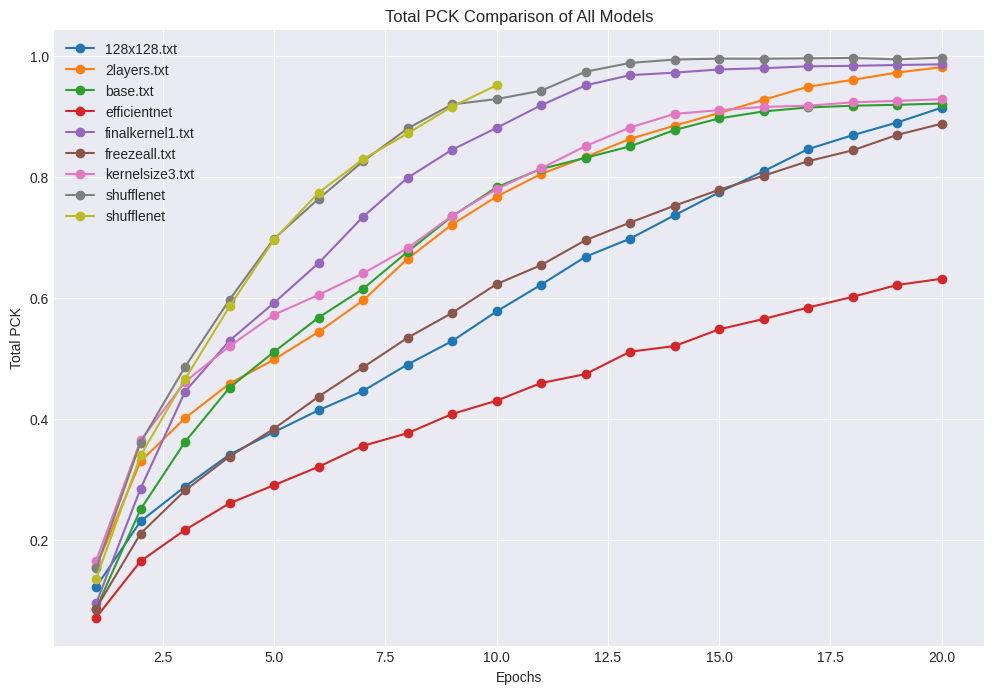

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

def plot_all_models_performance():
    # Model file names from the provided GitHub repository screenshot
    model_files = [
        "accuracies_training_128x128.txt",
        "accuracies_training_2layers.txt",
        "accuracies_training_base.txt",
        "accuracies_training_efficientnet_v2_s.txt",
        "accuracies_training_finalkernel1.txt",
        "accuracies_training_freezeall.txt",
        "accuracies_training_kernelsize3.txt",
        "accuracies_training_shufflenet_v2_x2_0.txt",
        "accuracies_training_shufflenet_v2_x2_0_10epoch.txt"
    ]

    # Base URL for the GitHub repository
    base_url = "https://raw.githubusercontent.com/JackdiQuadri97/HumanPoseEstimationLSP/main/accuracies_training/"

    plt.figure(figsize=(12, 8))

    for file_name in model_files:
        file_url = f"{base_url}{file_name}"
        response = requests.get(file_url)
        if response.status_code == 200:
            try:
                # Read the data, assuming that there are no headers and the separator is whitespace
                data = pd.read_csv(io.StringIO(response.text), delim_whitespace=True, header=None)
                # Adjusting the epoch number to start from 1
                plt.plot(data[0]+1, data[1], marker='o', label=file_name.split("_")[2])  # The label uses the third part of the file name
            except Exception as e:
                print(f"Error reading the file {file_name}: {e}")
        else:
            print(f"Failed to fetch the file: {file_name}, Status Code: {response.status_code}")

    plt.title('Total PCK Comparison of All Models')
    plt.xlabel('Epochs')
    plt.ylabel('Total PCK')
    plt.legend()
    plt.grid(True)

    # Save the figure before calling plt.show()
    plt.savefig('/content/all_models_performance.pdf', format='pdf')

    # Then, display the figure
    plt.show()


# Call the function to plot the graph
plot_all_models_performance()